Minimum Absolute Error: 0.7297


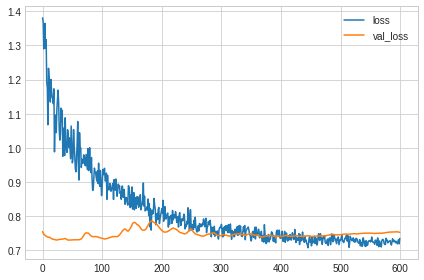

In [60]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import random

#using numpy's randint
df = pd.DataFrame(np.random.randint(0,7,size=(1000, 0)))
# create a new column 
for index, row in df.iterrows():
      df.at[index,'Day'] = np.random.randint(7)
      df.at[index,'Time'] = np.random.randint(24)
      if df.at[index, 'Day'] > 0 and df.at[index, 'Day'] < 5:
        if(df.at[index, 'Time'] > 6 and df.at[index, 'Day'] < 10 
           or df.at[index, 'Time'] > 10 and df.at[index, 'Day'] < 14 
           or df.at[index, 'Time'] > 19 and df.at[index, 'Day'] < 23):
          df.at[index,'Wait'] = np.random.randint(1,3)
          df.at[index,'Availability'] = np.random.randint(1,3)
        else:
          df.at[index,'Wait'] = np.random.randint(2)
          df.at[index,'Availability'] = np.random.randint(2)
      else:
        df.at[index,'Wait'] = np.random.randint(2)
        df.at[index,'Availability'] = np.random.randint(2)

## Holding the dataset filepaths
#line_file_path = 'temp'
# Reading the data
#line_data = pd.read_csv(line_file_path)

# Making numpy arrays out of the DataFrames
result_numpy = df.iloc[:,[2,3]].to_numpy()
input_numpy = df.iloc[:,[0,1]].to_numpy()

# Shuffling the input and result dataframes
result_numpy, input_numpy = shuffle(result_numpy, input_numpy, random_state=0)

# Splitting the arrays into training and validation 20%, 80% split
result_valid, result_train = train_test_split(result_numpy, test_size = 0.2, train_size = 0.8)
input_valid, input_train = train_test_split(input_numpy, test_size = 0.2, train_size = 0.8)

# Standardizing the data
# find the standard deviation of each feature within the training set
sigma = np.std(result_train, axis=0)
# find the mean of each feature within the training set
mu = np.mean(result_train, axis=0)
# standardize our data based on mu and sigma from the training set
standard_result_train = (result_train - mu) / sigma
standard_result_valid = (result_valid - mu) / sigma

# find the standard deviation of each feature within the training set
sigma = np.std(input_train, axis=0)
# find the mean of each feature within the training set
mu = np.mean(input_train, axis=0)
# standardize our data based on mu and sigma from the training set
standard_input_train = (input_train - mu) / sigma
standard_input_valid = (input_valid - mu) / sigma

# Creating the neural network
input_shape = [standard_input_train.shape[1]]
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    standard_input_train, standard_result_train,
    validation_data=(standard_input_valid, standard_result_valid),
    batch_size=512,
    epochs=600
,
    verbose=0,
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Absolute Error: {:0.4f}".format(history_df['val_loss'].min()))